# ДЗ №2

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Загрузка и подготовка датасета CIFAR-10

In [13]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.cifar10.load_data()

trainX = trainX.astype(np.float32) / 255.
testX = testX.astype(np.float32) / 255.

trainY = tf.keras.utils.to_categorical(trainy)
testY = tf.keras.utils.to_categorical(testy)
    
print('Train X=', trainX.shape, trainX.dtype)
print('Train Y= ', trainy.shape, trainy.dtype)

print('Test X= ', testX.shape, testX.dtype)
print('Test Y =', testy.shape, testy.dtype)

Train X= (50000, 32, 32, 3) float32
Train Y=  (50000, 1) uint8
Test X=  (10000, 32, 32, 3) float32
Test Y = (10000, 1) uint8


## Визуализация датасета

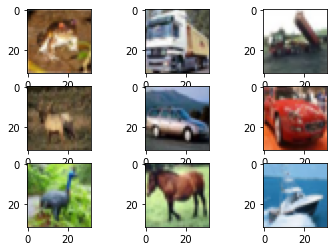

In [14]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i])
plt.show()

## Создание модели CNN

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Преобразования изображений

In [0]:
imggen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)

trainG = imggen.flow(trainX, trainY, batch_size=64)

## Обучение модели

In [17]:
NUM_EPOCHS = 100
STEPS = trainX.shape[0] // 64

history = model.fit(trainG,
                    steps_per_epoch=STEPS, 
                    epochs=NUM_EPOCHS,
                    validation_data=(testX, testY), 
                    shuffle=True,
                    verbose=1)

_, acc = model.evaluate(testX, testY, verbose=0)

print('\nКачество модели > %.3f' % (acc * 100.0))

Epoch 1/100
781/781 [==============================] - 38s 49ms/step - loss: 1.6440 - accuracy: 0.3958 - val_loss: 1.3601 - val_accuracy: 0.5028
Epoch 2/100
781/781 [==============================] - 39s 50ms/step - loss: 1.2838 - accuracy: 0.5382 - val_loss: 1.0495 - val_accuracy: 0.6225
Epoch 3/100
781/781 [==============================] - 38s 49ms/step - loss: 1.1339 - accuracy: 0.5992 - val_loss: 0.9081 - val_accuracy: 0.6778
Epoch 4/100
781/781 [==============================] - 39s 50ms/step - loss: 1.0412 - accuracy: 0.6327 - val_loss: 0.8698 - val_accuracy: 0.6959
Epoch 5/100
781/781 [==============================] - 39s 49ms/step - loss: 0.9787 - accuracy: 0.6542 - val_loss: 0.8637 - val_accuracy: 0.7042
Epoch 6/100
781/781 [==============================] - 39s 49ms/step - loss: 0.9337 - accuracy: 0.6729 - val_loss: 0.8260 - val_accuracy: 0.7135
Epoch 7/100
781/781 [==============================] - 39s 50ms/step - loss: 0.9032 - accuracy: 0.6843 - val_loss: 0.7846 - val_ac

## Запуск предсказания для случайного изображения из CIFAR dataset

In [0]:
def predict(sample, true = None):
    prediction = model(sample[None, ...])[0]
    print(f'Probability: {np.round(prediction, 2)}')
    print(f'Predicted Answer: {np.argmax(prediction)}')
    if true is not None:
        print(f'True Answer: {np.argmax(true)}')

    ans = np.argmax(prediction)
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample)
    plt.xticks([]), plt.yticks([])
    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)
    plt.show()

Probability: [0.01 0.01 0.12 0.28 0.07 0.13 0.04 0.21 0.   0.13]
Predicted Answer: 3
True Answer: 3


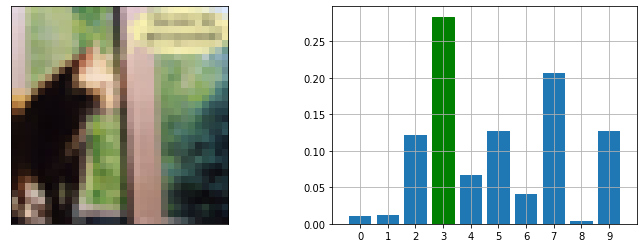

In [28]:
import random
idx = random.randint(0, testX.shape[0])
predict(testX[idx, ...], testY[idx])

## Запуск предсказания на нашем изображении

In [0]:
#!wget https://phototass3.cdnvideo.ru/width/1020_b9261fa1/tass/m2/uploads/i/20170619/4513691.jpg

взято отсюда https://phototass3.cdnvideo.ru/width/1020_b9261fa1/tass/m2/uploads/i/20170619/4513691.jpg

<img src="https://phototass3.cdnvideo.ru/width/1020_b9261fa1/tass/m2/uploads/i/20170619/4513691.jpg" width="50%">

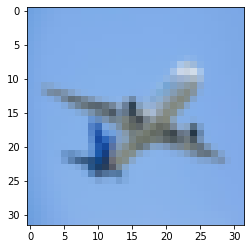

In [29]:
import imageio
from skimage.transform import resize
img = imageio.imread('4513691.jpg', pilmode="RGB")
img = img.astype(np.float32)/255
img = resize(img, (32, 32), order=3, mode='reflect', anti_aliasing=True)
plt.imshow(img)
plt.show()

Probability: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Answer: 0
True Answer: 0


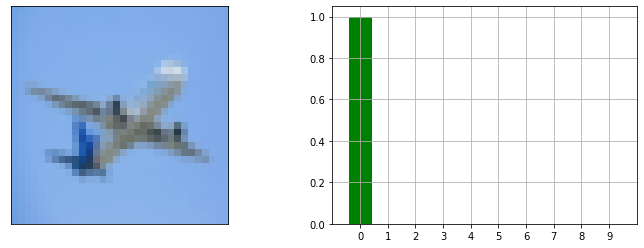

In [30]:
predict(img, 0)